In [1]:
!rm -rf /content/Split_data

In [2]:
!unzip -q '/content/drive/MyDrive/INTERNSHIP_VIHARA/PROJECT2/Split_data.zip' -d /content/

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os

In [22]:
training_data_path =  '/content/Split_data/Train/Group_7'
validation_data_path = '/content/Split_data/Validation/Group_7'

In [23]:
os.listdir(training_data_path)

['idli', 'fried_rice', 'ice_cream']

In [24]:
os.listdir(validation_data_path)

['idli', 'fried_rice', 'ice_cream']

In [25]:
os.listdir(training_data_path+'/fried_rice')

['048.jpg',
 '002.jpg',
 'images (12).jpg',
 '317.jpg',
 '318.jpg',
 '322.jpg',
 '014.jpg',
 'download (4).jpg',
 '131.jpg',
 '209.jpg',
 '076.jpg',
 '165.jpg',
 '233.jpg',
 '146.jpg',
 '199.jpg',
 '298.jpg',
 '270.jpg',
 '017.jpg',
 '008.jpg',
 '154.jpg',
 '068.jpg',
 '127.jpg',
 '101.jpg',
 '077.jpg',
 '263.jpg',
 '116.jpg',
 '044.jpg',
 '332.jpg',
 '218.jpg',
 '045.jpg',
 '227.jpg',
 '150.jpg',
 '170.jpg',
 '201.jpg',
 '159.jpg',
 '179.jpg',
 '326.jpg',
 '247.jpg',
 '287.jpg',
 '342.jpg',
 '169.jpg',
 '137.jpg',
 '024.jpeg',
 '308.jpg',
 '339.jpg',
 '171.jpg',
 '105.jpg',
 '079.jpg',
 '059.jpg',
 '103.jpg',
 '026.jpg',
 '109.jpg',
 '107.jpg',
 '335.jpg',
 '087.jpg',
 '302.jpg',
 '283.jpg',
 '099.jpg',
 'images (7).jpg',
 'download (3).jpg',
 '093.jpg',
 '181.jpg',
 '316.jpg',
 '220.jpg',
 '228.jpg',
 '003.jpg',
 '280.jpg',
 '053.jpg',
 '143.jpg',
 '178.jpg',
 '089.jpg',
 '203.jpg',
 '246.jpg',
 '333.jpg',
 '152.jpg',
 '144.jpg',
 'download (11).jpg',
 '230.jpg',
 '305.jpg',
 '102.jp

In [26]:
os.listdir(training_data_path+'/idli')

['208.jpg',
 '010.jpg',
 '054.jpg',
 '048.jpg',
 '075.jpg',
 'images (12).jpg',
 'images (3).jpg',
 '260.jpg',
 'download (5).jpg',
 '131.jpg',
 '209.jpg',
 '284.jpg',
 '153.jpg',
 'download.jpg',
 '265.jpg',
 '276.jpg',
 '122.jpg',
 '042.jpg',
 '300.jpg',
 '270.jpg',
 '017.jpg',
 '197.jpg',
 '114.jpg',
 '154.jpg',
 '068.jpg',
 '049.jpg',
 '101.jpg',
 '185.jpg',
 '077.jpg',
 '263.jpg',
 '272.jpg',
 '111.jpg',
 '268.jpg',
 '085.jpg',
 '015.jpg',
 '218.jpg',
 '069.jpg',
 '045.jpg',
 '286.jpg',
 '182.jpg',
 '046.jpg',
 '170.jpg',
 '129.jpg',
 '012.jpg',
 '159.jpg',
 '282.jpg',
 'images (1).jpg',
 '224.jpg',
 'images (17).jpg',
 '169.jpg',
 '079.jpg',
 '011.JPG',
 '026.jpg',
 '275.jpg',
 '019.JPG',
 '212.jpg',
 '061.jpg',
 '006.jpg',
 '261.jpg',
 '302.jpg',
 '070.jpg',
 '058.jpg',
 'images (7).jpg',
 '164.jpg',
 '128.jpg',
 '220.jpg',
 '118.jpg',
 '003.jpg',
 '236.jpg',
 '180.jpg',
 '117.jpg',
 '052.jpg',
 'images (18).jpg',
 'images (6).jpg',
 '089.jpg',
 '297.jpg',
 '216.jpg',
 '072.jpg'

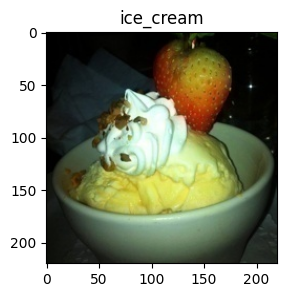

In [27]:
plt.figure(figsize=(5,3))
plt.title('ice_cream')
Baked_potato = plt.imread(training_data_path + '/ice_cream/1052863.jpg')
plt.imshow(Baked_potato)
plt.show()

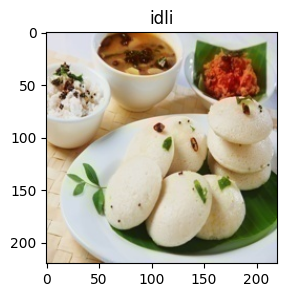

In [28]:
plt.figure(figsize=(5,3))
plt.title('idli')
Donut = plt.imread(training_data_path + '/idli/017.jpg')
plt.imshow(Donut)
plt.show()

**Image Data Augumentation**

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
group7_path = os.path.join(training_data_path)
labels = sorted([name for name in os.listdir(group7_path)
                 if os.path.isdir(os.path.join(group7_path, name))])
print("Group_7 Classes:", labels)


Group_7 Classes: ['fried_rice', 'ice_cream', 'idli']


In [31]:
training_set = ImageDataGenerator(rescale = 1 / 255,
                                  rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

validation_set = ImageDataGenerator(rescale = 1 / 255,rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [32]:
train_input_data = training_set.flow_from_directory(training_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 20)

val_input_data = validation_set.flow_from_directory(validation_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 30)

Found 360 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.activations import relu,sigmoid


In [34]:
import warnings
warnings.filterwarnings('ignore')

# Model architecture

model = Sequential()

# 1st Filter (or) Hidden layer
model.add(Conv2D(64, kernel_size=(3,3), kernel_initializer='he_uniform', padding='valid', strides=1, input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Filter (or) Hidden layer
model.add(Conv2D(32 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd Filter (or) Hidden layer
model.add(Conv2D(8 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 4th Filter (or) Hidden layer
model.add(Conv2D(4 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(16,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(2,kernel_initializer='he_uniform',activation='relu'))

model.add(Dense(1,kernel_initializer='he_uniform',activation='sigmoid'))

In [35]:
num_classes = 3

model = Sequential([
    Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform',
                     padding='same', input_shape=(256,256,3)),
                     BatchNormalization(),
                     MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
                      BatchNormalization(),
                      MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'),
                      BatchNormalization(),
                      MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
                      Dropout(0.3),
    Dense(num_classes, activation='softmax')])

In [36]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,871,875 (64.36 MB)

 Trainable params: 16,871,427 (64.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [37]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [38]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_input_data,
    epochs=50,
    validation_data=val_input_data
)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 112s 6s/step - accuracy: 0.5927 - loss: 2.4483 - val_accuracy: 0.3333 - val_loss: 7.1982
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 108s 6s/step - accuracy: 0.8003 - loss: 1.1155 - val_accuracy: 0.3417 - val_loss: 4.4423
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 120s 7s/step - accuracy: 0.8206 - loss: 0.8947 - val_accuracy: 0.3917 - val_loss: 4.2852
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 108s 6s/step - accuracy: 0.8368 - loss: 0.4311 - val_accuracy: 0.5083 - val_loss: 3.5466
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 107s 6s/step - accuracy: 0.8838 - loss: 0.3420 - val_accuracy: 0.6000 - val_loss: 2.3704
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 109s 6s/step - accuracy: 0.8684 - loss: 0.3367 - val_accuracy: 0.6917 - val_loss: 2.0058
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 108s 6s/step - accuracy: 0.8794 - loss: 0.2559 - val_accuracy: 0.6917 - val_loss: 1.9283
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 108s 6s/step - accuracy: 0.9228 - loss: 0.1888 - val_accuracy: 0.7083 - v

**test_model**

In [39]:
import cv2

In [40]:
labels

['fried_rice', 'ice_cream', 'idli']

In [41]:
train_input_data.class_indices

{'fried_rice': 0, 'ice_cream': 1, 'idli': 2}

In [42]:
def fun(path):
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt

    # Load and preprocess the image
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found: {path}")

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img_rgb, (256, 256))
    normalized = resized / 255.0
    input_image = np.expand_dims(normalized, axis=0)

    # Predict using the model
    pred = model.predict(input_image)

    # Mapping only for Group_1 (train_input_data created from Group_1 folder)
    mapping = train_input_data.class_indices  # Automatically has only 3 classes
    inv_map = {v: k for k, v in mapping.items()}

    # Get predicted class index and label
    predicted_index = np.argmax(pred)
    predicted_label = inv_map[predicted_index]

    # Print for debugging
    print("Group_1 class mapping:", mapping)
    print("Model raw output:", pred)
    print(f"Predicted class index: {predicted_index}")
    print(f"Predicted label: {predicted_label}")

    # Display image with prediction
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label}")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
Group_1 class mapping: {'fried_rice': 0, 'ice_cream': 1, 'idli': 2}
Model raw output: [[9.9999630e-01 3.7468524e-06 1.1606015e-09]]
Predicted class index: 0
Predicted label: fried_rice


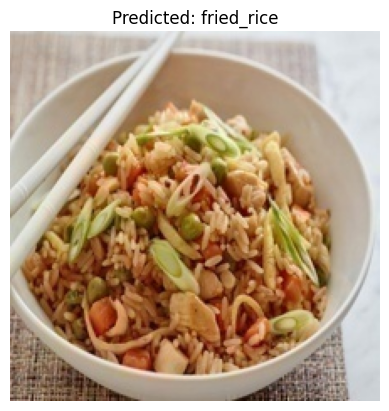

In [43]:
fun('/content/Split_data/Train/Group_7/fried_rice/024.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Group_1 class mapping: {'fried_rice': 0, 'ice_cream': 1, 'idli': 2}
Model raw output: [[9.9999630e-01 3.7468524e-06 1.1606015e-09]]
Predicted class index: 0
Predicted label: fried_rice


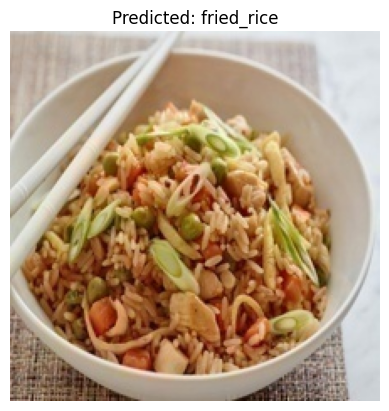

In [44]:
fun('/content/Split_data/Train/Group_7/fried_rice/024.jpeg')

In [55]:
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [56]:
test_data_path = '/content/Split_data/Test/Group_7'

In [57]:
labels =  ['fried_rice', 'ice_cream', 'idli']


In [58]:
test_set = ImageDataGenerator(rescale=1./255)

test_input_data = test_set.flow_from_directory(
    test_data_path,
    classes=labels,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=10,
    shuffle=False
)


Found 120 images belonging to 3 classes.


In [59]:
test_input_data.reset()
predictions = model.predict(test_input_data, verbose=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 490ms/step


In [60]:
from sklearn.metrics import classification_report, accuracy_score

In [61]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_input_data.classes

In [62]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(test_input_data.class_indices.keys())))

Classification Report:

              precision    recall  f1-score   support

  fried_rice       0.88      0.93      0.90        40
   ice_cream       0.84      0.93      0.88        40
        idli       0.85      0.72      0.78        40

    accuracy                           0.86       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.86      0.86      0.86       120



In [63]:
accuracy = accuracy_score(y_true, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")


Test Accuracy: 0.8583


In [65]:
model.save('/content/train_group7.h5')
print("Model saved successfully at /content/custom_food_model.h5")

Model saved successfully at /content/custom_food_model.h5


In [66]:
from tensorflow.keras.models import load_model
model = load_model('/content/train_group7.h5')
